In [1]:
import tensorflow as tf
import numpy as np

## What are Graphs?

- Tensorflow Eager execution allows to execute statement by statement like python and return the results
- While eager execution has several unique advantages, graph execution enables portability outside Python and tends to offer better performance. 
- Graph execution means that tensor computations are executed as a TensorFlow graph, sometimes referred to as a tf.Graph or simply a "graph." 
- Graphs are data structures that contain a set of tf.Operation objects, which represent units of computation; and tf.Tensor objects, which represent the units of data that flow between operations. They are defined in a tf.Graph context. 
- Since these graphs are data structures, they can be saved, run, and restored all without the original Python code.
- This is what a TensorFlow graph representing a two-layer neural network looks like when visualized in TensorBoard:

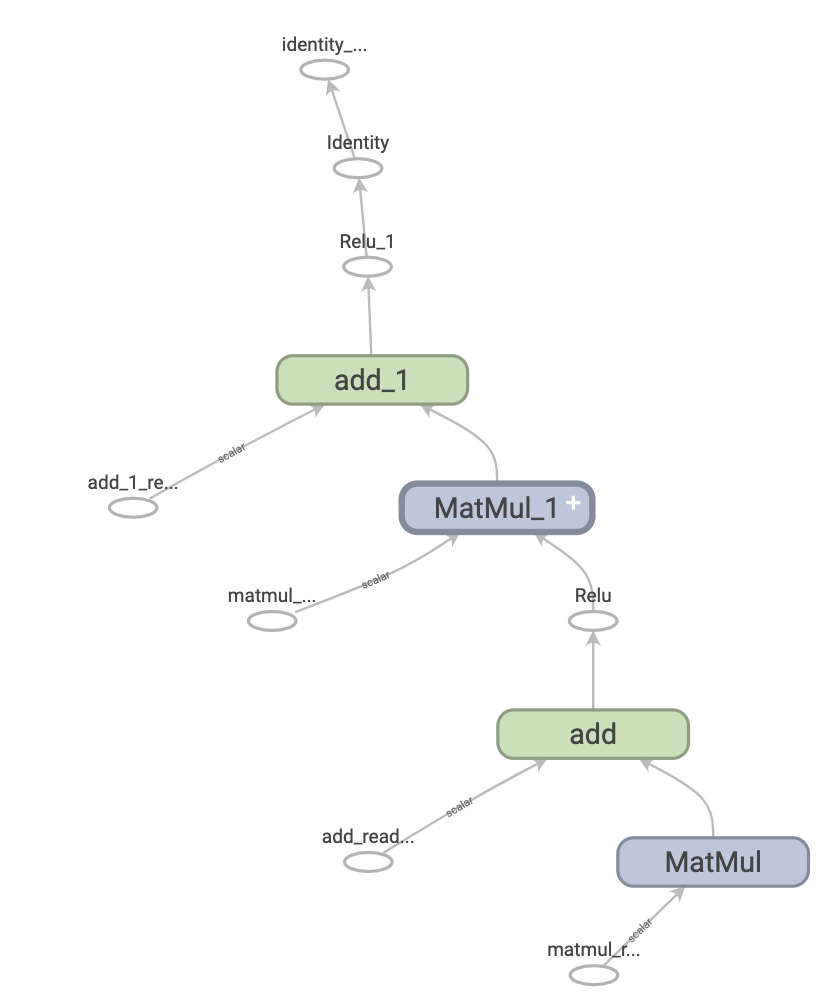

### Benifits of Graph

- Graphs provide a flexibility of using Tensorflow graph in environments that don't have python interpretor like mobile applications, embedded services, and backend servers.
- TensorFlow uses graphs as the format for saved models when it exports them from Python.
- Graphs are also easily optimized, allowing the compiler to do transformations like:

        - Statically infer the value of tensors by folding constant nodes in your computation ("constant folding").
        - Separate sub-parts of a computation that are independent and split them between threads or devices.
        - Simplify arithmetic operations by eliminating common subexpressions.

- There is an entire optimization system, Grappler, to perform this and other speedups.
- In short, graphs are extremely useful and let your TensorFlow run fast, run in parallel, and run efficiently on multiple devices.
- However, you still want to define your machine learning models (or other computations) in Python for convenience, and then automatically construct graphs when you need them.


### Creating A Graph

- After creating a function we can make it as a graph by using "tf.function" either by direct usage or as a decorator
- It can be used as a normal python function but uses a Graph from Tensorflow

In [2]:
# Define a Normal Python Function
def a_regular_python_function(x,y,b):
    x = tf.matmul(x,y)
    x = x+b
    return x

# Convert it as a tensorflow function
a_function_that_uses_graph = tf.function(a_regular_python_function)
x1 = tf.constant([[1.0,2.0]])
y1 = tf.constant([[2.0], [3.0]])
b1 = tf.constant(4.0)

python_function_value = a_regular_python_function(x1,y1,b1).numpy()
tf_function_value = a_function_that_uses_graph(x1,y1,b1).numpy()

assert(python_function_value == tf_function_value)

On the outside, a Function looks like a regular function you write using TensorFlow operations. Underneath, however, it is very different. A Function encapsulates several tf.Graphs behind one API (learn more in the Polymorphism section). That is how a Function is able to give you the benefits of graph execution, like speed and deployability (refer to The benefits of graphs above).

tf.function applies to a function and all other functions it calls:

In [3]:
def inner_function(x, y, b):
  x = tf.matmul(x, y)
  x = x + b
  return x

# Use the decorator to make `outer_function` a `Function`.
@tf.function
def outer_function(x):
  y = tf.constant([[2.0], [3.0]])
  b = tf.constant(4.0)

  return inner_function(x, y, b)

# Note that the callable will create a graph that
# includes `inner_function` as well as `outer_function`.
outer_function(tf.constant([[1.0, 2.0]])).numpy()

array([[12.]], dtype=float32)

### Converting Python functions to graphs
Any function you write with TensorFlow will contain a mixture of built-in TF operations and Python logic, such as if-then clauses, loops, break, return, continue, and more. While TensorFlow operations are easily captured by a tf.Graph, Python-specific logic needs to undergo an extra step in order to become part of the graph. tf.function uses a library called AutoGraph (tf.autograph) to convert Python code into graph-generating code.

In [4]:
def simple_relu(x):
  if tf.greater(x, 0):
    return x
  else:
    return 0

# `tf_simple_relu` is a TensorFlow `Function` that wraps `simple_relu`.
tf_simple_relu = tf.function(simple_relu)

print("First branch, with graph:", tf_simple_relu(tf.constant(1)).numpy())
print("Second branch, with graph:", tf_simple_relu(tf.constant(-1)).numpy())

First branch, with graph: 1
Second branch, with graph: 0


In [5]:
# Though it is unlikely that you will need to view graphs directly, you can inspect the outputs to check the exact results. 
# These are not easy to read, so no need to look too carefully!
# This is the graph-generating output of AutoGraph.
print(tf.autograph.to_code(simple_relu))

def tf__simple_relu(x):
    with ag__.FunctionScope('simple_relu', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (do_return, retval_)

        def set_state(vars_):
            nonlocal retval_, do_return
            (do_return, retval_) = vars_

        def if_body():
            nonlocal retval_, do_return
            try:
                do_return = True
                retval_ = ag__.ld(x)
            except:
                do_return = False
                raise

        def else_body():
            nonlocal retval_, do_return
            try:
                do_return = True
                retval_ = 0
            except:
                do_return = False
                raise
        ag__.if_stmt(ag__.converted_call(ag__.ld(tf).greater, (ag__.ld(x), 0), None, fscope), if_bo

In [6]:
# This is the graph itself.
print(tf_simple_relu.get_concrete_function(tf.constant(1)).graph.as_graph_def())

node {
  name: "x"
  op: "Placeholder"
  attr {
    key: "_user_specified_name"
    value {
      s: "x"
    }
  }
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "shape"
    value {
      shape {
      }
    }
  }
}
node {
  name: "Greater/y"
  op: "Const"
  attr {
    key: "dtype"
    value {
      type: DT_INT32
    }
  }
  attr {
    key: "value"
    value {
      tensor {
        dtype: DT_INT32
        tensor_shape {
        }
        int_val: 0
      }
    }
  }
}
node {
  name: "Greater"
  op: "Greater"
  input: "x"
  input: "Greater/y"
  attr {
    key: "T"
    value {
      type: DT_INT32
    }
  }
}
node {
  name: "cond"
  op: "StatelessIf"
  input: "Greater"
  input: "x"
  attr {
    key: "Tcond"
    value {
      type: DT_BOOL
    }
  }
  attr {
    key: "Tin"
    value {
      list {
        type: DT_INT32
      }
    }
  }
  attr {
    key: "Tout"
    value {
      list {
        type: DT_BOOL
        type: DT_INT32
      }
    }
  

### Polymorphism: one Function, many graphs
- A tf.Graph is specialized to a specific type of inputs (for example, tensors with a specific dtype or objects with the same id()).
- Each time you invoke a Function with a set of arguments that can't be handled by any of its existing graphs (such as arguments with new dtypes or incompatible shapes), Function creates a new tf.Graph specialized to those new arguments. 
- The type specification of a tf.Graph's inputs is known as its input signature or just a signature. 
- The Function stores the tf.Graph corresponding to that signature in a ConcreteFunction. A ConcreteFunction is a wrapper around a tf.Graph.

In [7]:
@tf.function
def my_relu(x):
  return tf.maximum(0., x)

# `my_relu` creates new graphs as it observes more signatures.
print(my_relu(tf.constant(5.5)))
print(my_relu([1, -1]))
print(my_relu(tf.constant([3., -3.])))

tf.Tensor(5.5, shape=(), dtype=float32)
tf.Tensor([1. 0.], shape=(2,), dtype=float32)
tf.Tensor([3. 0.], shape=(2,), dtype=float32)


In [8]:
# If the Function has already been called with that signature, Function does not create a new tf.Graph.
# These two calls do *not* create new graphs.
print(my_relu(tf.constant(-2.5))) # Signature matches `tf.constant(5.5)`.
print(my_relu(tf.constant([-1., 1.]))) # Signature matches `tf.constant([3., -3.])`.

tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor([0. 1.], shape=(2,), dtype=float32)


In [9]:
# Because it's backed by multiple graphs, a Function is polymorphic. 
# That enables it to support more input types than a single tf.Graph could represent, and to optimize each tf.Graph for better performance.
# There are three `ConcreteFunction`s (one for each graph) in `my_relu`.
# The `ConcreteFunction` also knows the return type and shape!
print(my_relu.pretty_printed_concrete_signatures())

my_relu(x)
  Args:
    x: float32 Tensor, shape=()
  Returns:
    float32 Tensor, shape=()

my_relu(x=[1, -1])
  Returns:
    float32 Tensor, shape=(2,)

my_relu(x)
  Args:
    x: float32 Tensor, shape=(2,)
  Returns:
    float32 Tensor, shape=(2,)


## Using tf.function
 In practice, getting tf.function to work correctly can be tricky! In the following sections, you'll learn how you can make your code work as expected with tf.function.
### Graph execution vs. eager execution
The code in a Function can be executed both eagerly and as a graph. By default, Function executes its code as a graph:


In [10]:
@tf.function
def get_MSE(y_true, y_pred):
  sq_diff = tf.pow(y_true - y_pred, 2)
  return tf.reduce_mean(sq_diff)

y_true = tf.random.uniform([5], maxval=10, dtype=tf.int32)
y_pred = tf.random.uniform([5], maxval=10, dtype=tf.int32)
print(y_true)
print(y_pred)
get_MSE(y_true, y_pred)

tf.Tensor([1 1 1 6 7], shape=(5,), dtype=int32)
tf.Tensor([9 3 1 7 3], shape=(5,), dtype=int32)


<tf.Tensor: shape=(), dtype=int32, numpy=17>

In [11]:
# To verify that your Function's graph is doing the same computation as its equivalent Python function, 
# you can make it execute eagerly with tf.config.run_functions_eagerly(True). 
# This is a switch that turns off Function's ability to create and run graphs, instead of executing the code normally.
tf.config.run_functions_eagerly(True)
get_MSE(y_true, y_pred)

<tf.Tensor: shape=(), dtype=int32, numpy=17>

In [12]:
# Don't forget to set it back when you are done.
tf.config.run_functions_eagerly(False)

In [13]:
# However, Function can behave differently under graph and eager execution. 
# The Python print function is one example of how these two modes differ. 
# Let's check out what happens when you insert a print statement to your function and call it repeatedly.
@tf.function
def get_MSE(y_true, y_pred):
  print("Calculating MSE!")
  sq_diff = tf.pow(y_true - y_pred, 2)
  return tf.reduce_mean(sq_diff)

error = get_MSE(y_true, y_pred)
error = get_MSE(y_true, y_pred)
error = get_MSE(y_true, y_pred)

Calculating MSE!


In [14]:
# Is the output surprising? get_MSE only printed once even though it was called three times.
# To explain, the print statement is executed when Function runs the original code in order to create the graph in a process 
# known as "tracing" (refer to the Tracing section of the tf.function guide. 
# Tracing captures the TensorFlow operations into a graph, and print is not captured in the graph. 
# That graph is then executed for all three calls without ever running the Python code again.

# As a sanity check, let's turn off graph execution to compare:
# Now, globally set everything to run eagerly to force eager execution.

tf.config.run_functions_eagerly(True)
# Observe what is printed below.
error = get_MSE(y_true, y_pred)
error = get_MSE(y_true, y_pred)
error = get_MSE(y_true, y_pred)

Calculating MSE!
Calculating MSE!
Calculating MSE!


In [15]:
tf.config.run_functions_eagerly(False)
# print is a Python side effect, and there are other differences that you should be aware of when converting a function into a Function. 
# Learn more in the Limitations section of the Better performance with tf.function guide.

### Non-strict execution

